<a href="https://colab.research.google.com/github/MykytaPetrenko/Forex_DQN/blob/master/MarketPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [0]:
import pandas_datareader.data as pdr
import fix_yahoo_finance as fix
import numpy as np
import tensorflow as tf
import math
from matplotlib.pyplot import figure
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['font.size']= 14
rcParams['font.family']= 'serif'

#Input section

In [0]:
SEQ_LEN = 64

#Data preparation

**Load market data from yahoo.finance**

Text(0.5, 1.0, 'Initial data')

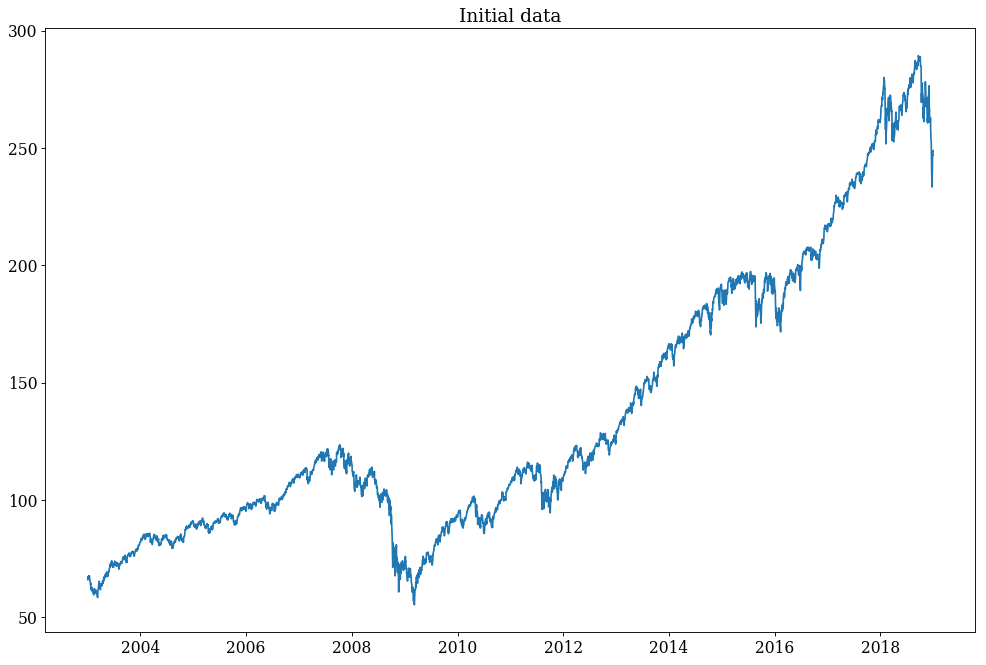

In [0]:
#fix.pdr_override()
data = pdr.get_data_yahoo("SPY", "2003-01-01", "2019-01-01")
data = data[['Adj Close']]
#data = np.array(data)
figure(num=None, figsize=(15, 10), dpi=80)
plt.plot(data)
plt.title('Initial data')

In [0]:
X, Y = [],[]
for i in range((len(data)//SEQ_LEN)*SEQ_LEN - SEQ_LEN - 1):
  x = np.array(data.iloc[i: i + SEQ_LEN])
  y = np.array(data.iloc[i + SEQ_LEN + 1])
  X.append(x)
  Y.append(y)
X = np.array(X)
Y = np.array(Y)
X /=200
Y /=200

**Split data on train and test dataset**

In [0]:
ratio = 0.9
length = int(len(X) * ratio)
X_train = X[:length]
Y_train = Y[:length]
X_test = X[length:]
Y_test = Y[length:]

In [0]:
np.random.seed(777)
inputs = tf.keras.layers.Input(shape=(SEQ_LEN, 1))
x = tf.keras.layers.Conv1D(64,3)(inputs)
x = tf.keras.layers.Conv1D(64,3)(x)
x = tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.Conv1D(128,3)(x)
x = tf.keras.layers.Conv1D(128,3)(x)
x = tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.Conv1D(256,3)(x)
x = tf.keras.layers.Conv1D(256,3)(x)
x = tf.keras.layers.Conv1D(256,3)(x)
x = tf.keras.layers.MaxPooling1D(2)(x)
#x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(1000, activation=tf.nn.relu)(x)
#x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
#x = tf.keras.layers.LSTM(100, return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(100, return_sequences=False)(x)
#x = tf.keras.layers.LSTM(20)(x)
# dropout=0.2, recurrent_dropout=0.2
out = tf.keras.layers.Dense(1, activation=tf.nn.relu)(x)
model = tf.keras.Model(inputs,out)
adam = optimizer=tf.keras.optimizers.Adam(lr=1e-5)
model.compile(adam, loss=tf.keras.losses.MSE, metrics=[tf.keras.metrics.MAE])
model.summary()

**Train model**

In [0]:
model.fit(X_train, Y_train, epochs=100)

#Test model

**Estimate on train data**

3512/3512 [==============================] - 1s 163us/sample - loss: 2.3554e-04 - mean_absolute_error: 0.0113
0.015347240783176373


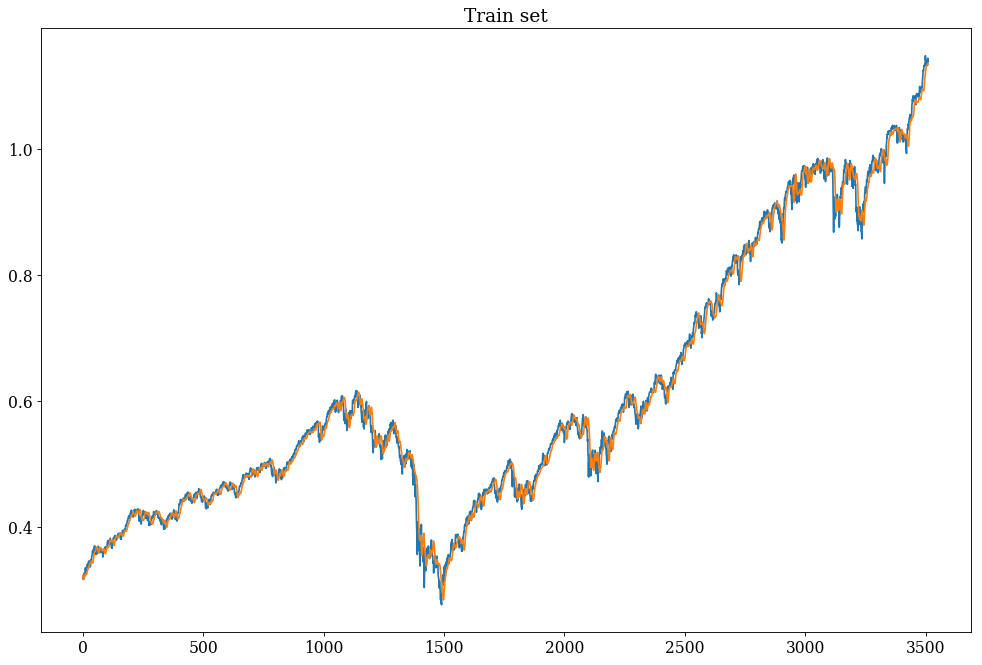

In [0]:
figure(num=None, figsize=(15, 10), dpi=80)
mse,mae = model.evaluate(X_train,Y_train)
print(math.sqrt(mse))
predict_train = model.predict(X_train,verbose=0)
plt.title('Train set')
plt.plot(Y_train,)
plt.plot(predict_train)

**Estimate on test data**

391/391 [==============================] - 0s 172us/sample - loss: 7.6614e-04 - mean_absolute_error: 0.0214
0.027679316195605208


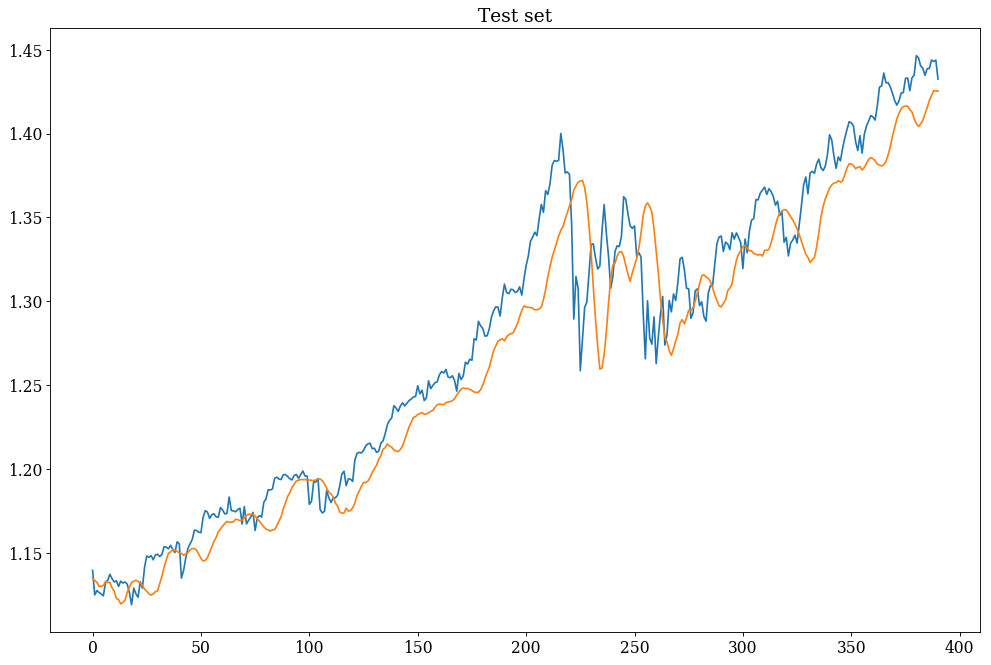

In [0]:

figure(num=None, figsize=(15, 10), dpi=80)
predict_test = model.predict(X_test,verbose=0)
mse,mae = model.evaluate(X_test,Y_test)
print(math.sqrt(mse))
plt.title('Test set')
plt.plot(Y_test)
plt.plot(predict_test)